In [2]:
# Import Libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# Creating a path
path = r'C:\Users\zwier\anaconda_projects\15-01-2025 Instacart Basket Analysis'

In [4]:
# importing df
# customers = pd.read_csv(os.path.join(path, '02 Data','Original Data', 'customers.csv'))
# orders = pd.read_csv(os.path.join(path, '02 Data','Original Data', 'orders.csv'))
# products = pd.read_csv(os.path.join(path, '02 Data','Original Data', 'products.csv'))
# orders_products_prior = pd.read_csv(os.path.join(path, '02 Data','Original Data', 'orders_products_prior.csv'))
# ords_prods_merge4_8 = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'ords_prods_merge4.8.pkl'))
instacart_merged_filtered = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'instacart_merged_filtered.pkl'))

In [9]:
shapes_df = pd.DataFrame({
    "Dataset": ["customers", "orders", "products", "orders_products_prior"], #, "ords_prods_merge4.8", "instacart_merged_filtered"
    "Shape": [customers.shape, orders.shape, products.shape, orders_products_prior.shape] # , ords_prods_merge4_8.shape, instacart_merged_filtered.shape
})

print(shapes_df)

                 Dataset          Shape
0              customers   (206209, 10)
1                 orders   (3421083, 7)
2               products     (49693, 5)
3  orders_products_prior  (32434489, 4)


In [11]:
# Funkcja do sprawdzenia brakujących wartości i duplikatów
def check_consistency(df_dict):
    consistency_results = []
    
    for name, df in df_dict.items():
        missing_values = df.isnull().sum().sum()  # Liczba wszystkich brakujących wartości
        duplicates = df.duplicated().sum()  # Liczba duplikatów
        
        consistency_results.append([name, missing_values, "-", duplicates])
    
    return pd.DataFrame(consistency_results, columns=["Dataset", "Missing values", "Missing values treatment", "Duplicates"])

# Lista datasetów do analizy
datasets = {
    "orders": orders,
    "products": products,
    "orders_products_prior": orders_products_prior,
    "customers": customers,
    #"ords_prods_merge4.8": ords_prods_merge4_8,
    #"instacart_merged_filtered": instacart_merged_filtered
}

# Tworzenie tabeli z wynikami
consistency_df = check_consistency(datasets)

# Wyświetlenie wyników
print(consistency_df)


                 Dataset  Missing values Missing values treatment  Duplicates
0                 orders          206209                        -           0
1               products              16                        -           5
2  orders_products_prior               0                        -           0
3              customers           11259                        -           0


In [17]:
missing_values = products.isnull().sum()
print(missing_values)

product_id        0
product_name     16
aisle_id          0
department_id     0
prices            0
dtype: int64


In [15]:
print(missing_values)

user_id             0
First Name      11259
Surnam              0
Gender              0
STATE               0
Age                 0
date_joined         0
n_dependants        0
fam_status          0
income              0
dtype: int64


In [8]:
instacart_merged_filtered.dtypes

order_id                         float64
user_id                          float64
order_number                     float64
orders_day_of_week               float64
order_hour_of_day                float64
days_since_prior_order           float64
product_id                       float64
add_to_cart_order                float64
reordered                        float64
product_name                      object
aisle_id                         float64
department_id                    float64
prices                           float64
_merge                          category
busiest_day                       object
Busiest days                      object
busiest_period_of_day             object
max_order                        float64
loyalty_flag                      object
mean_price                       float64
spending_flag                     object
median_frequency                 float64
order_frequency_flag              object
first_name                        object
last_name       

### Popularity of Product Categories

C:\Users\zwier\AppData\Local\Temp\ipykernel_19056\1484117981.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dept_counts.index, y=dept_counts.values, palette='viridis')


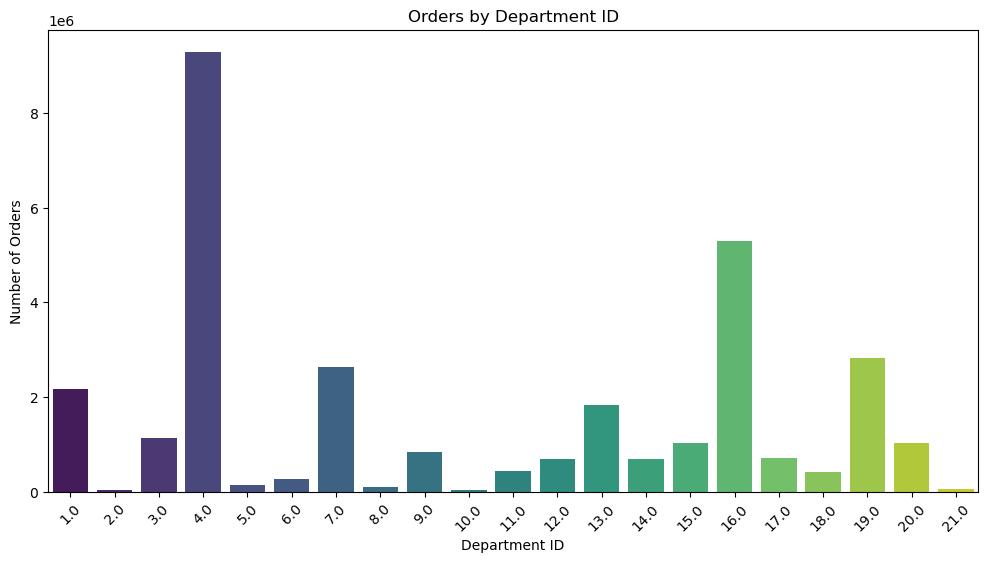

In [28]:
# Define path where to save the image
save_path = os.path.join(path, '04 Analysis', 'Visualizations', 'orders_by_department.png')

# Count orders by department
dept_counts = instacart_merged_filtered['department_id'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=dept_counts.index, y=dept_counts.values, palette='viridis')
plt.xlabel("Department ID")
plt.ylabel("Number of Orders")
plt.title("Orders by Department ID")
plt.xticks(rotation=45)

# Save the figure correctly
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


### Peak Shopping Hours

C:\Users\zwier\AppData\Local\Temp\ipykernel_19056\961290380.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hourly_orders.index, y=hourly_orders.values, palette='Blues')


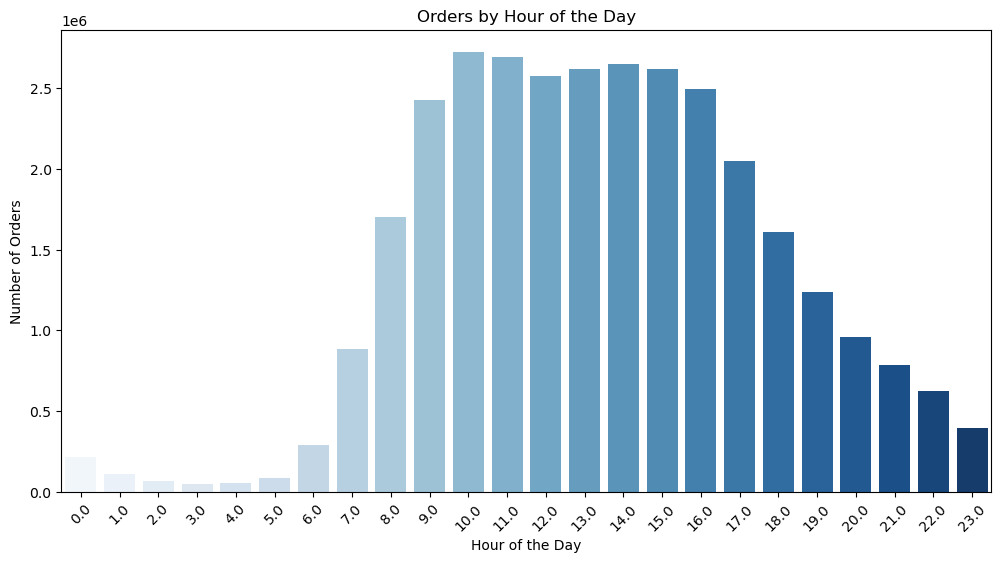

In [36]:
# Define path where to save the image
save_path = os.path.join(path, '04 Analysis', 'Visualizations', 'orders_by_hour.png')

# Count orders by hour of the day
hourly_orders = instacart_merged_filtered['order_hour_of_day'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.barplot(x=hourly_orders.index, y=hourly_orders.values, palette='Blues')
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Orders")
plt.title("Orders by Hour of the Day")
plt.xticks(rotation=45)

# Save the figure correctly
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


### Peak Shopping Days

C:\Users\zwier\AppData\Local\Temp\ipykernel_19056\3140006502.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weekly_orders.index, y=weekly_orders.values, palette='coolwarm')


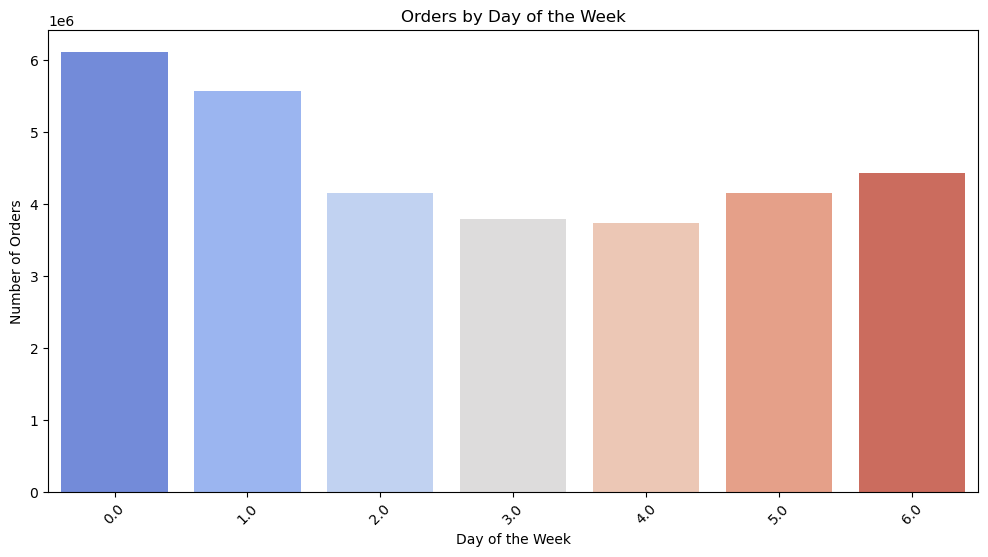

In [38]:
# Define path where to save the image
save_path = os.path.join(path, '04 Analysis', 'Visualizations', 'orders_by_day.png')

# Count orders by day of the week
weekly_orders = instacart_merged_filtered['orders_day_of_week'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.barplot(x=weekly_orders.index, y=weekly_orders.values, palette='coolwarm')
plt.xlabel("Day of the Week")
plt.ylabel("Number of Orders")
plt.title("Orders by Day of the Week")
plt.xticks(rotation=45)

# Save the figure correctly
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


### Customer Profile Segmentation

C:\Users\zwier\AppData\Local\Temp\ipykernel_19056\2388507378.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=profile_counts.index, y=profile_counts.values, palette='muted')


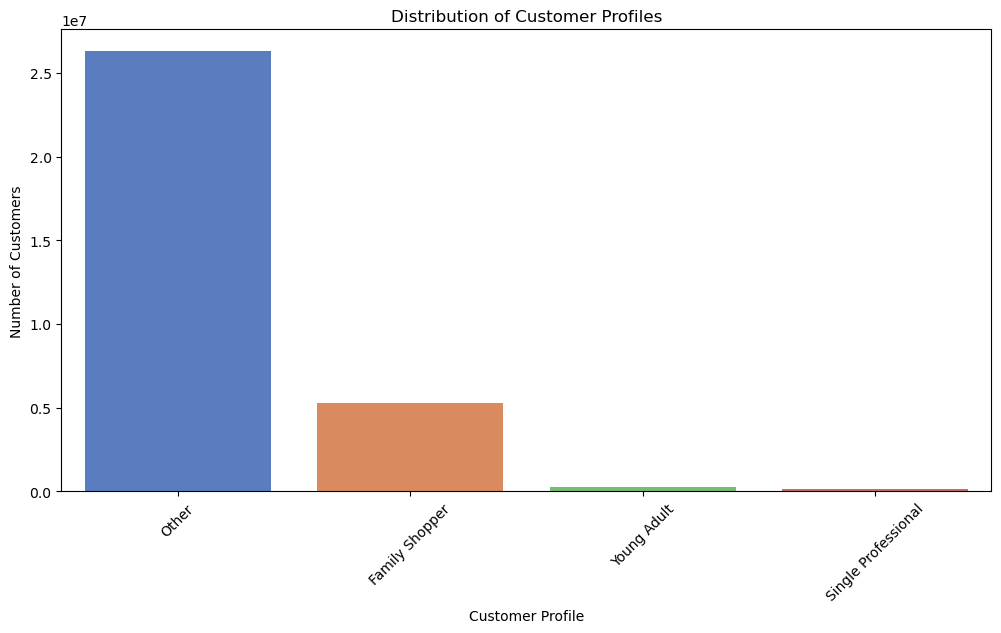

In [40]:
# Define path where to save the image
save_path = os.path.join(path, '04 Analysis', 'Visualizations', 'customer_profiles.png')

# Count customers by profile type
profile_counts = instacart_merged_filtered['customer_profile'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=profile_counts.index, y=profile_counts.values, palette='muted')
plt.xlabel("Customer Profile")
plt.ylabel("Number of Customers")
plt.title("Distribution of Customer Profiles")
plt.xticks(rotation=45)

# Save the figure correctly
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


### Customer Loyalty Levels

C:\Users\zwier\AppData\Local\Temp\ipykernel_19056\3224792302.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=loyalty_counts.index, y=loyalty_counts.values, palette='pastel')


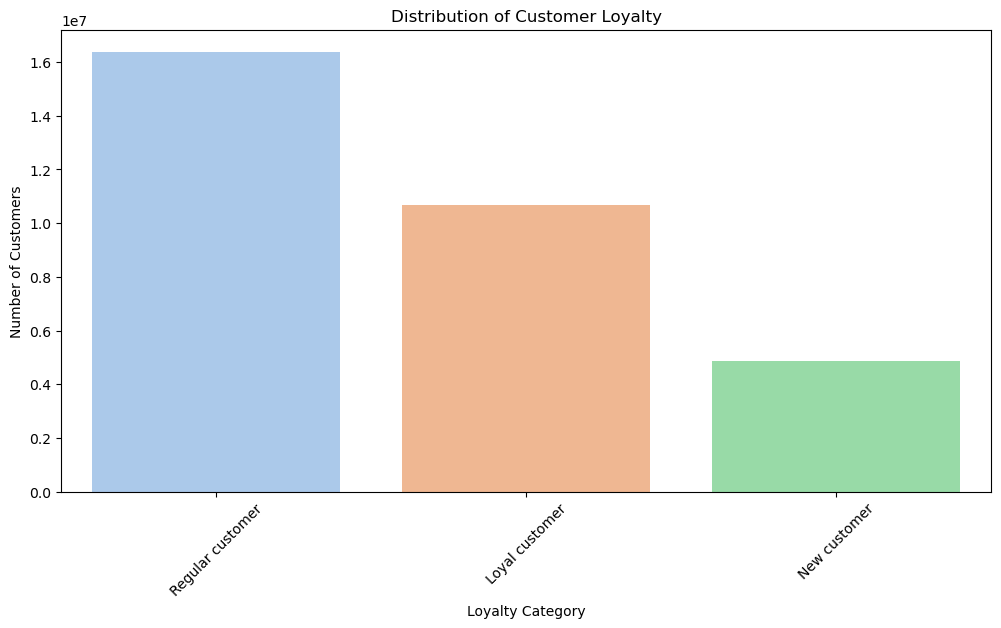

In [42]:
# Define path where to save the image
save_path = os.path.join(path, '04 Analysis', 'Visualizations', 'customer_loyalty.png')

# Count customers by loyalty level
loyalty_counts = instacart_merged_filtered['loyalty_flag'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=loyalty_counts.index, y=loyalty_counts.values, palette='pastel')
plt.xlabel("Loyalty Category")
plt.ylabel("Number of Customers")
plt.title("Distribution of Customer Loyalty")
plt.xticks(rotation=45)

# Save the figure correctly
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


### Spending Trends by Hour of the Day

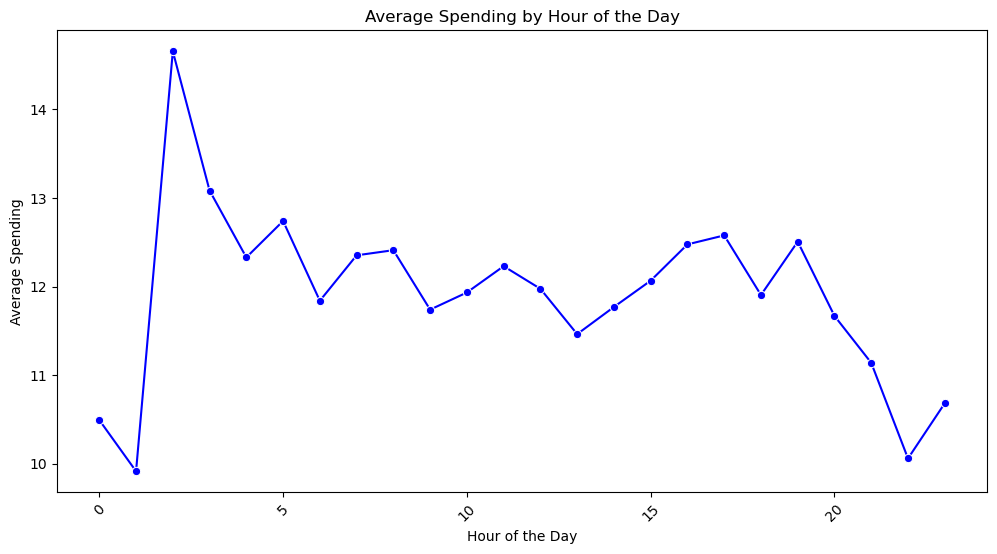

In [44]:
# Define path where to save the image
save_path = os.path.join(path, '04 Analysis', 'Visualizations', 'spending_by_hour.png')

# Calculate average spending per hour
hourly_spending = instacart_merged_filtered.groupby('order_hour_of_day')['prices'].mean()

plt.figure(figsize=(12, 6))
sns.lineplot(x=hourly_spending.index, y=hourly_spending.values, marker='o', color='b')
plt.xlabel("Hour of the Day")
plt.ylabel("Average Spending")
plt.title("Average Spending by Hour of the Day")
plt.xticks(rotation=45)

# Save the figure correctly
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show the plot
plt.show()
